# Packages import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

## Import and process data

In [2]:
data_train = pd.read_csv('train_motion_data.csv')
data_test = pd.read_csv('test_motion_data.csv')

In [3]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
train_mask = is_number(data_train.dtypes)
test_mask = is_number(data_train.dtypes)

print('No gaps' if pd.api.types.is_numeric_dtype(data_train) and pd.api.types.is_numeric_dtype(data_test) else 'Replace some data in column', data_train.columns[~train_mask], data_test.columns[~test_mask])

Replace some data in column Index(['Class'], dtype='object') Index(['Class'], dtype='object')


Replace data that first column will be a Class data

In [4]:
data_train = data_train[['Class'] + [x for x in data_train.columns if x != 'Class']]
data_test = data_test[['Class'] + [x for x in data_test.columns if x != 'Class']]

In [5]:
data_train

,Class,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
0,NORMAL,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,3581629
1,NORMAL,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,3581630
2,NORMAL,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,3581630
3,NORMAL,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,3581631
4,NORMAL,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,3581631
...,...,...,...,...,...,...,...,...
3639,SLOW,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,3583789
3640,SLOW,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,3583790
3641,SLOW,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,3583790
3642,SLOW,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,3583791


Normalizing time unit for more informatives graphs

In [6]:
data_train['Timestamp'] = data_train['Timestamp'] - data_train['Timestamp'].min()
data_test['Timestamp'] = data_test['Timestamp'] - data_test['Timestamp'].min()

Separate data for their classes

In [7]:
train_normal = data_train.loc[data_train['Class'] == 'NORMAL']
train_slow = data_train.loc[data_train['Class'] == 'SLOW']
train_aggressive = data_train.loc[data_train['Class'] == 'AGGRESSIVE']

test_normal = data_test.loc[data_test['Class'] == 'NORMAL']
test_slow = data_test.loc[data_test['Class'] == 'SLOW']
test_aggressive = data_test.loc[data_test['Class'] == 'AGGRESSIVE']

In [8]:
train_normal

,Class,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
0,NORMAL,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,0
1,NORMAL,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1
2,NORMAL,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,1
3,NORMAL,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,2
4,NORMAL,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,2
...,...,...,...,...,...,...,...,...
1195,NORMAL,-0.820672,2.556599,-0.617599,-0.031612,-0.865596,-0.962189,645
1196,NORMAL,-0.016871,1.171574,0.603792,0.253662,0.692110,0.537485,646
1197,NORMAL,2.488864,-1.001262,0.432143,0.140041,-0.080023,0.051847,646
1198,NORMAL,-0.680338,-0.048300,-3.298533,-0.169057,-0.383012,0.217392,647


In [9]:
test_normal

,Class,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
814,NORMAL,0.697619,0.105949,0.331605,0.083689,0.000840,0.050549,518
815,NORMAL,1.124378,4.308813,-1.341221,0.006720,0.002673,-0.002596,518
816,NORMAL,-0.217551,0.020554,0.070902,0.003054,-0.004047,0.004123,519
817,NORMAL,0.367346,0.377823,0.020036,0.001222,-0.073686,0.011454,520
818,NORMAL,-0.113025,-0.038479,0.146810,0.001833,0.004505,-0.017868,520
...,...,...,...,...,...,...,...,...
1806,NORMAL,1.416944,-1.247972,-0.623418,1.490511,0.917138,-0.976315,1054
1807,NORMAL,0.324851,-2.679708,1.041722,0.502742,0.657520,0.315665,1054
1808,NORMAL,1.073423,-2.018279,0.978626,0.117897,-0.869643,0.040164,1055
1809,NORMAL,-0.828570,-2.477492,4.760305,0.131336,0.312381,0.222813,1055


## Print data in fancy figures

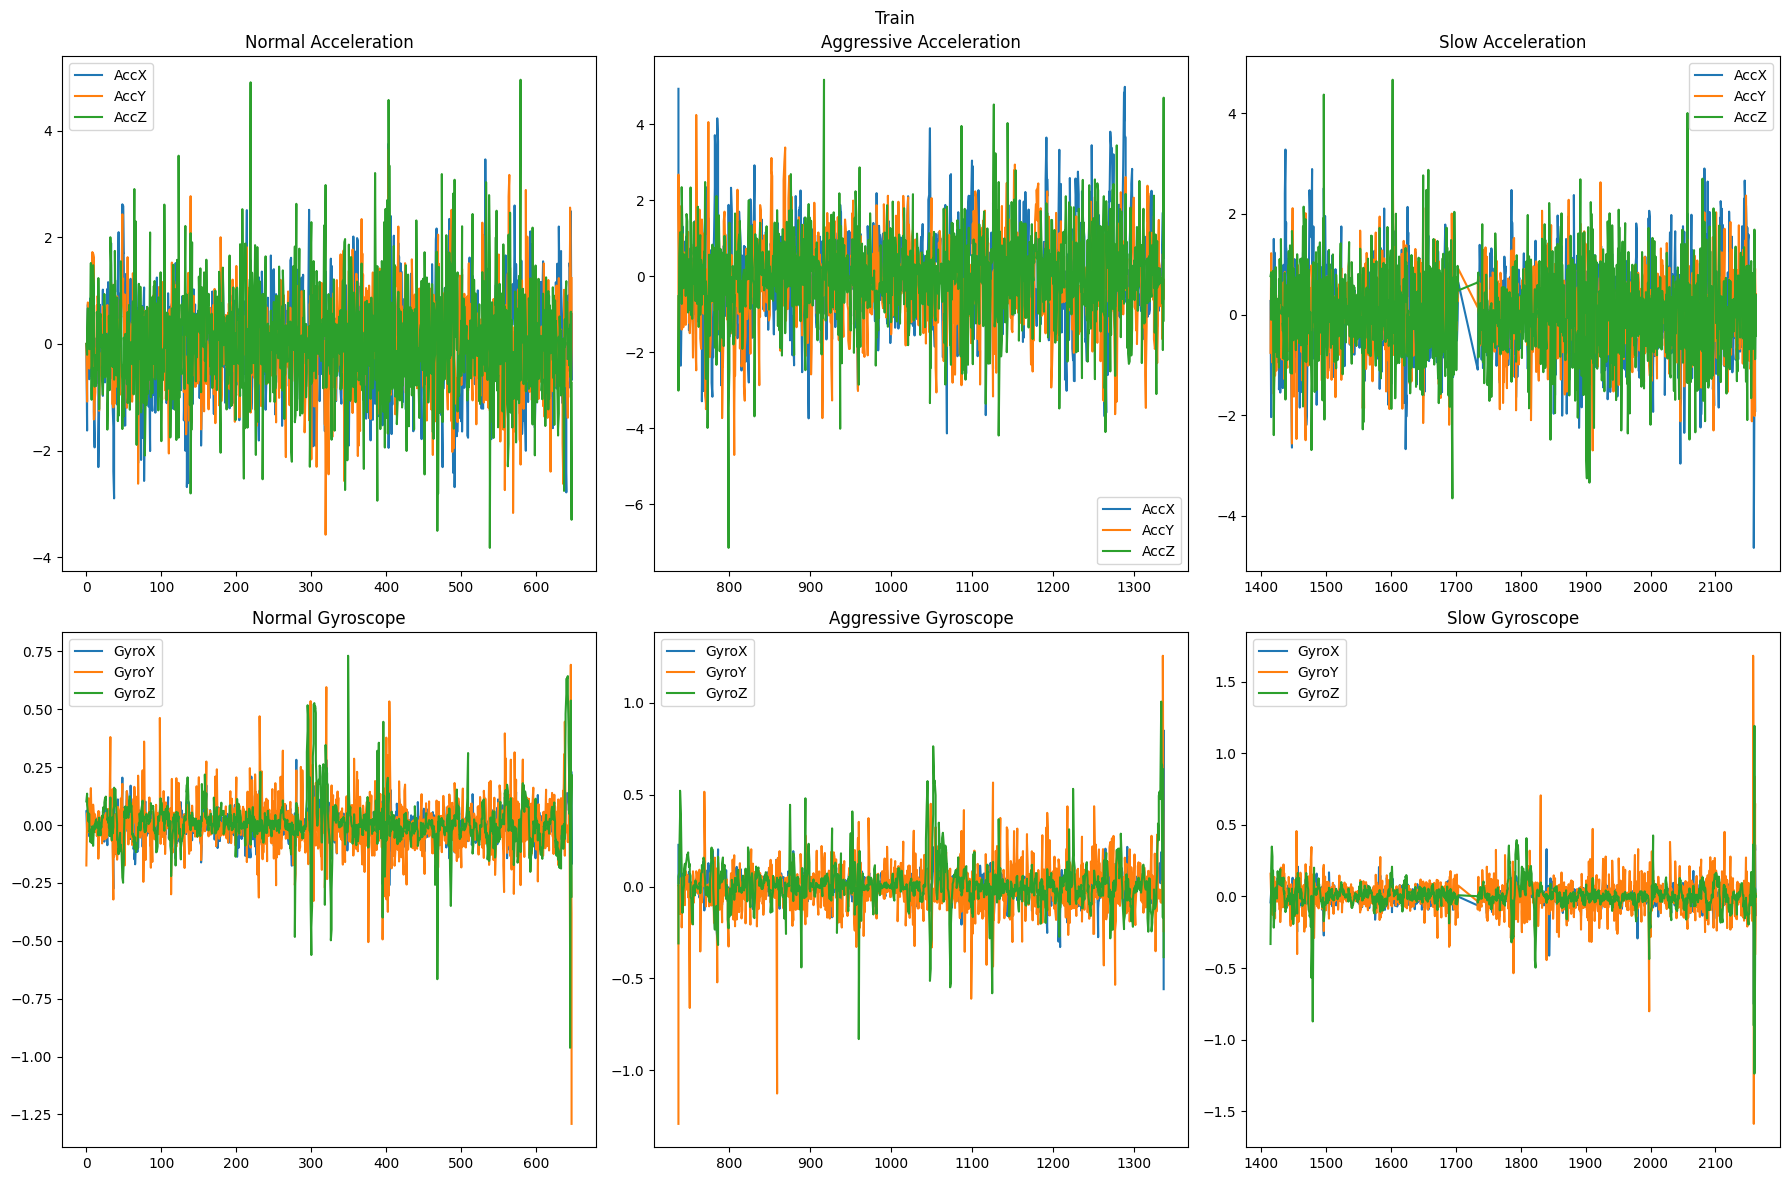

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

classes_train = [train_normal, train_aggressive, train_slow]
graph = ['Acc', 'Gyro']
classes_names = ['Normal', 'Aggressive', 'Slow']*2
names = ['Acceleration', 'Gyroscope']

fig.suptitle('Train')

for i in range(len(graph)):
    for j, ax in enumerate(axs.flatten()[i*3:3+i*3]):
        ax.plot(classes_train[j]['Timestamp'], classes_train[j][graph[i]+'X'], label= graph[i] + 'X')
        ax.plot(classes_train[j]['Timestamp'], classes_train[j][graph[i]+'Y'], label= graph[i] + 'Y')
        ax.plot(classes_train[j]['Timestamp'], classes_train[j][graph[i]+'Z'], label= graph[i] + 'Z')
        ax.set_title(classes_names[j]+' '+names[i])
        ax.legend()

plt.tight_layout()
plt.show()

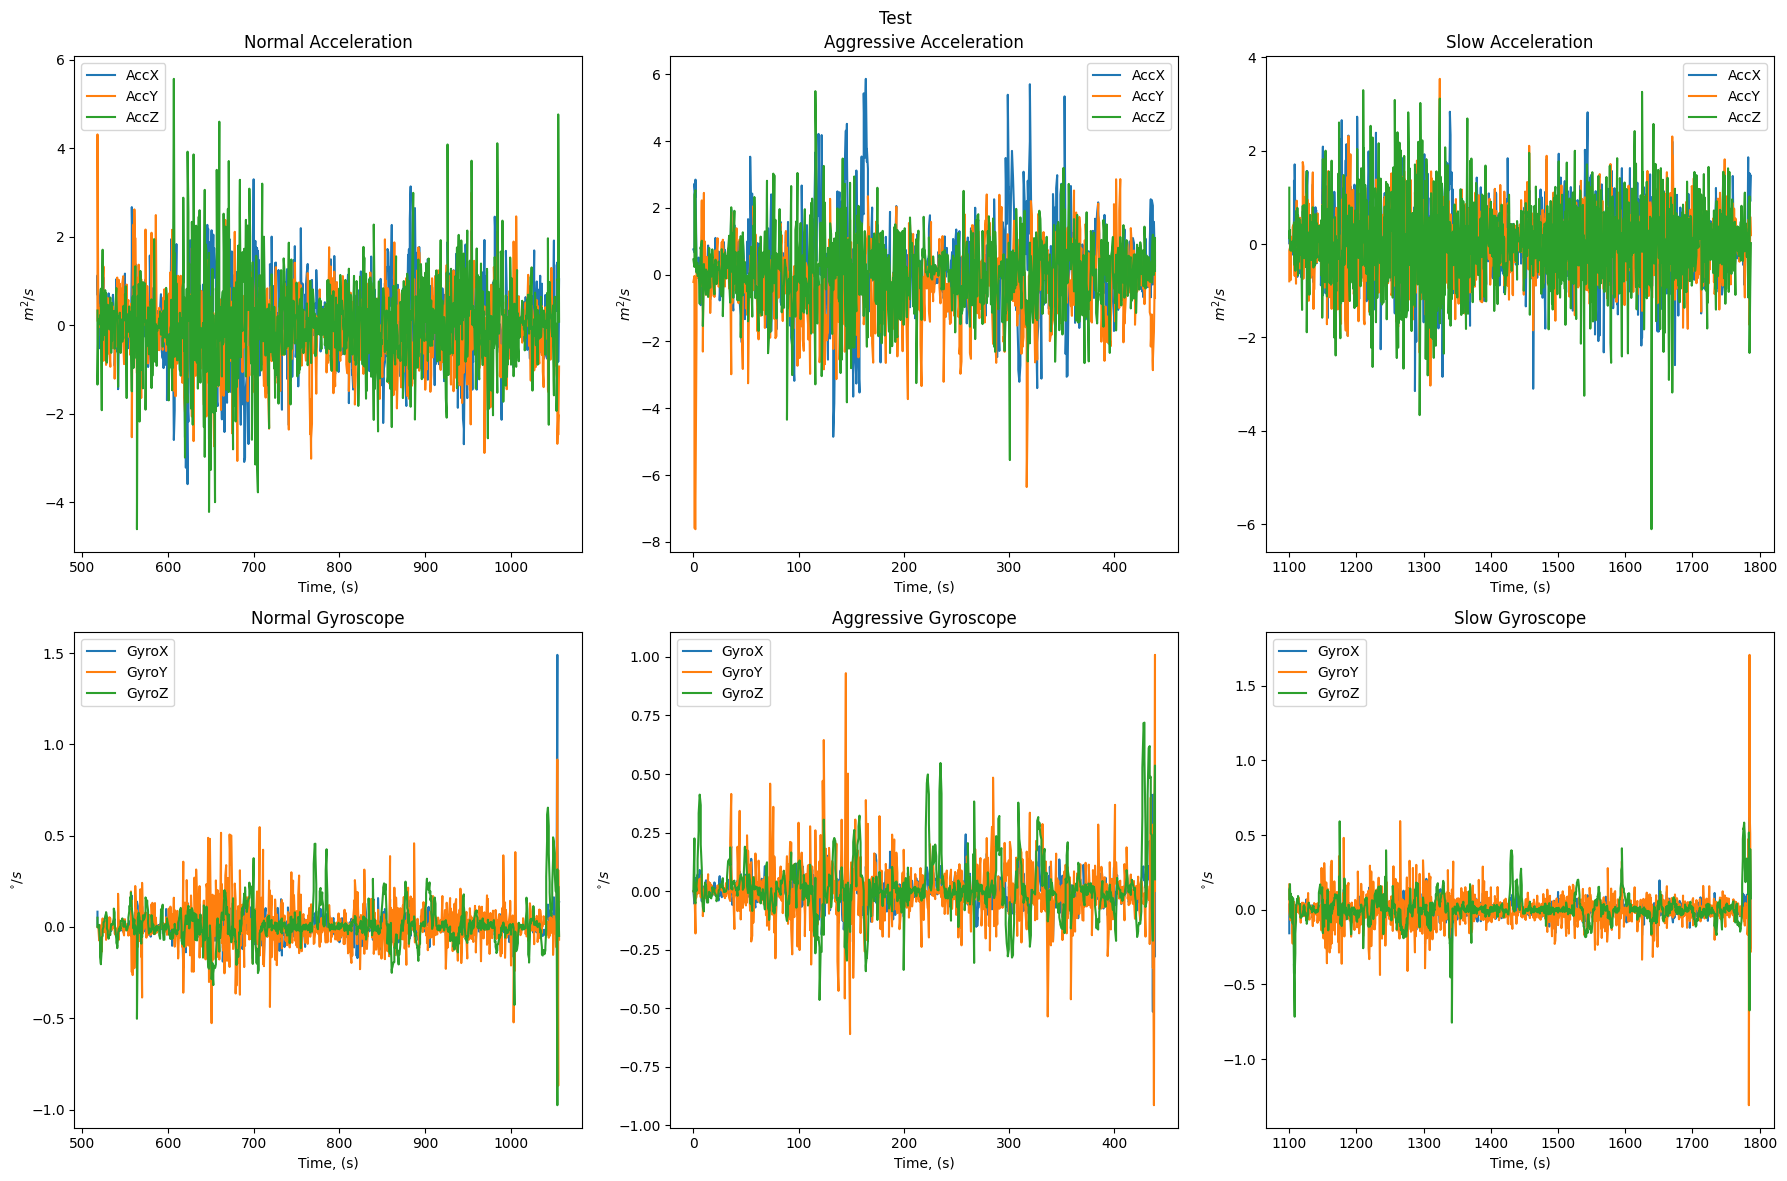

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

classes_train = [test_normal, test_aggressive, test_slow]
graph = ['Acc', 'Gyro']
classes_names = ['Normal', 'Aggressive', 'Slow']*2
names = ['Acceleration', 'Gyroscope']
units = ['$m^2/s$', '$^{\circ}/s$']

fig.suptitle('Test')

for i in range(len(graph)):
    for j, ax in enumerate(axs.flatten()[i*3:3+i*3]):
        ax.plot(classes_train[j]['Timestamp'], classes_train[j][graph[i]+'X'], label= graph[i] + 'X')
        ax.plot(classes_train[j]['Timestamp'], classes_train[j][graph[i]+'Y'], label= graph[i] + 'Y')
        ax.plot(classes_train[j]['Timestamp'], classes_train[j][graph[i]+'Z'], label= graph[i] + 'Z')
        ax.set_title(classes_names[j]+' '+names[i])
        ax.set_xlabel('Time, (s)')
        ax.set_ylabel(r""+units[i])
        ax.legend()

plt.tight_layout()
plt.show()

In [12]:
from scipy.signal import savgol_filter

def vec_length(x, y, z):
    return np.round((x**2 + y**2 + z**2)**0.5,4)

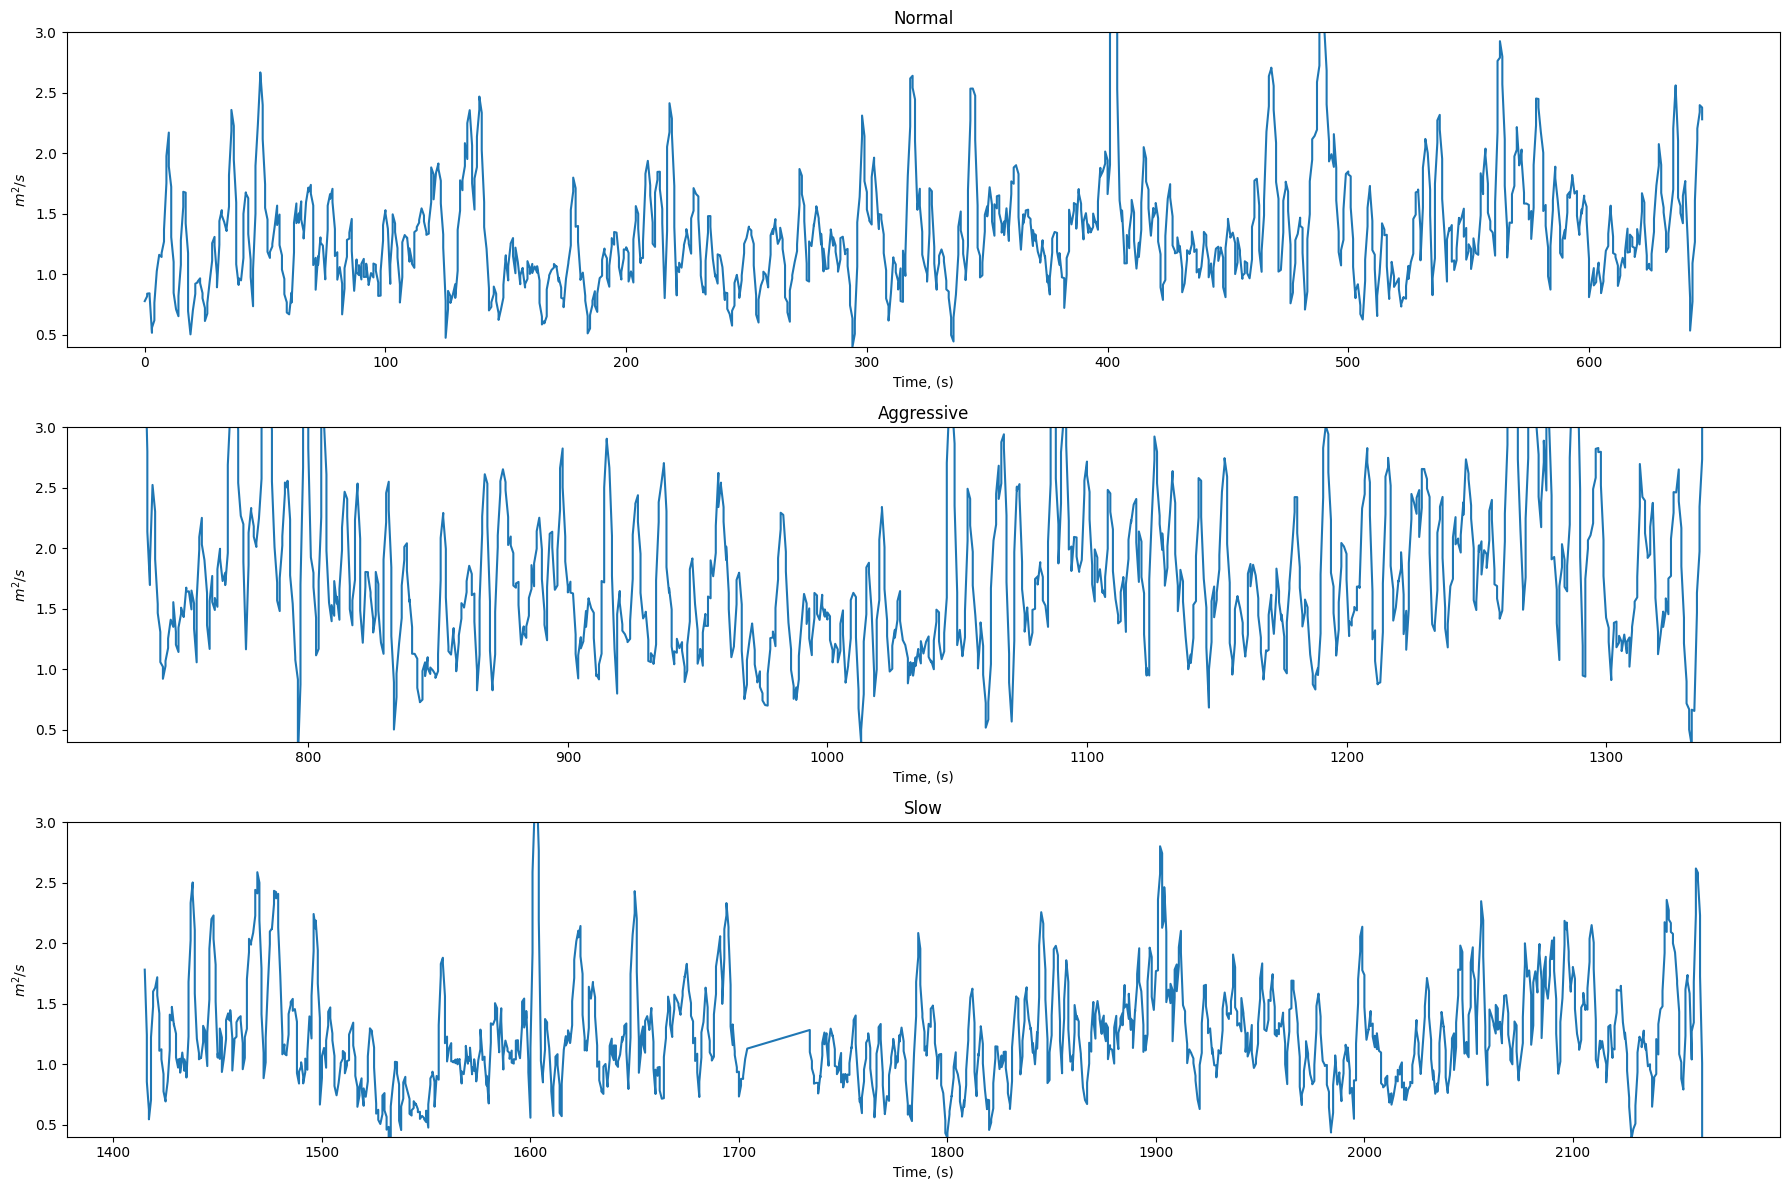

In [71]:
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

classes_train = [train_normal, train_aggressive, train_slow]
graph = ['Acc', 'Gyro']
classes_names = ['Normal', 'Aggressive', 'Slow']
names = ['Acceleration', 'Gyroscope']

acceleration_train = pd.DataFrame()

for i in range(len(classes_names)):
    acc_length = vec_length(classes_train[i].iloc[:, 1], classes_train[i].iloc[:, 2], classes_train[i].iloc[:, 3])
    axs[i].plot(classes_train[i]['Timestamp'], savgol_filter(acc_length, 10, 2))
    axs[i].set_title(classes_names[i])
    axs[i].set_ylim([0.4, 3])
    axs[i].set_xlabel('Time, (s)')
    axs[i].set_ylabel(r"$m^2/s$")
    
plt.tight_layout()
plt.show()

In [63]:
acceleration_train

,AccNormal,AccAggressive,AccSlow


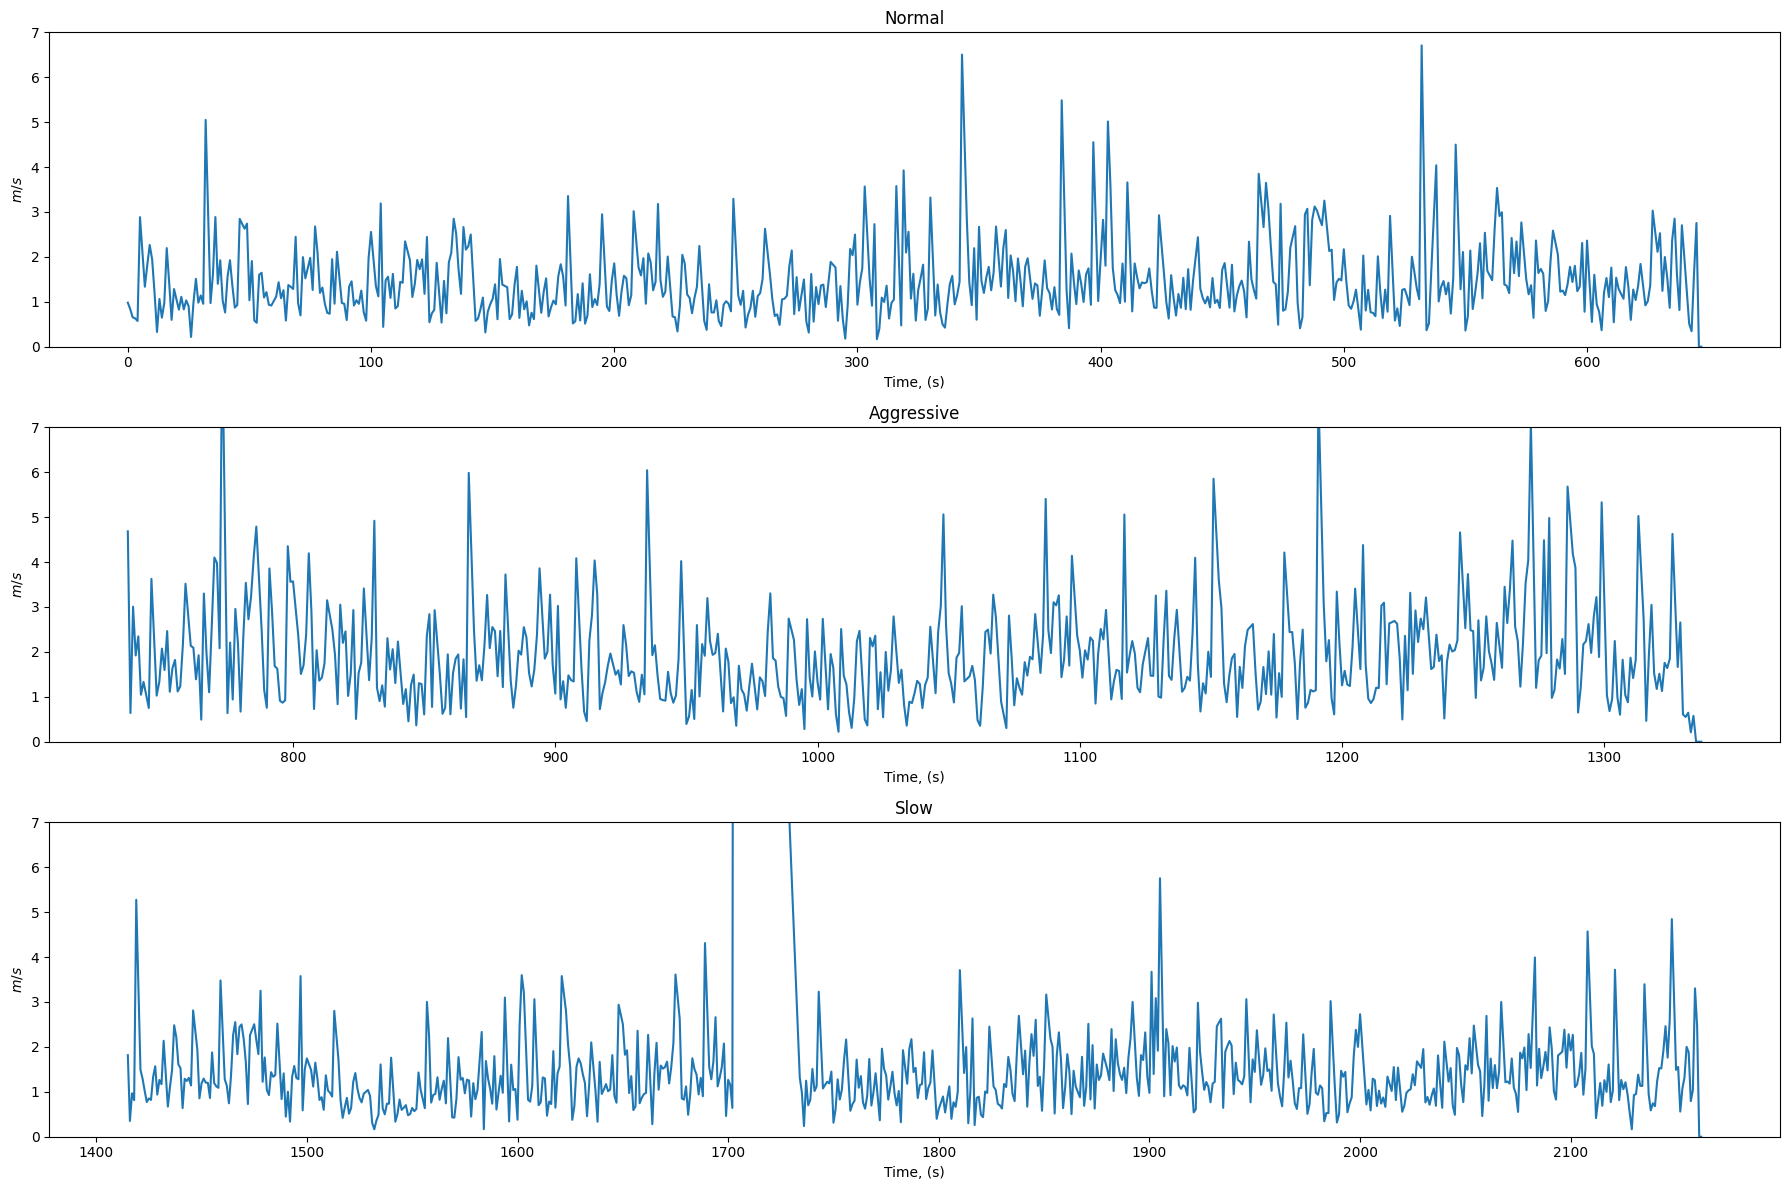

In [34]:
from scipy.integrate import quad

fig, axs = plt.subplots(3, 1, figsize=(18, 12))

classes_train = [train_normal, train_aggressive, train_slow]
classes_names = ['Normal', 'Aggressive', 'Slow']
names = ['Acceleration', 'Gyroscope']

def funcs(x, times, Comp_normals):
    return np.interp(x, times[first:second], Comp_normals[first:second])

for i in range(len(classes_names)):
    time = classes_train[i]['Timestamp']
    accel_data = np.column_stack((classes_train[i].iloc[:, 1], classes_train[i].iloc[:, 2], classes_train[i].iloc[:, 3]))  # Simulated accelerometer data
    gyro_data = np.column_stack((classes_train[i].iloc[:, 4], classes_train[i].iloc[:, 5], classes_train[i].iloc[:, 6]))  # Simulated gyroscope data

    Comp_normal = vec_length(accel_data[:,0], accel_data[:,1],accel_data[:,2])

    time_step = 2
    Integrate = np.zeros(len(time))

    for separator in range(round(len(time)/time_step)-time_step):
        first = separator*time_step
        second = time_step+separator*time_step
        Integrate[first] = quad(funcs, time.iloc[first], time.iloc[second], args=(time, Comp_normal))[0]

    axs[i].plot(time[::time_step], Integrate[::time_step])
    axs[i].set_title(classes_names[i])
    axs[i].set_ylim([0, 7])
    axs[i].set_xlabel('Time, (s)')
    axs[i].set_ylabel(r"$m/s$") 

plt.tight_layout()
plt.show()

In [37]:
def complementary_filter(accel_data, gyro_data, alpha=0.01, dt=0.5):
    rot_x = np.arctan2(accel_data[:,0], np.sqrt(accel_data[:,1]**2+accel_data[:,2]**2)) + gyro_data[:,0]*0.5
    rot_y = np.arctan2(accel_data[:,1], np.sqrt(accel_data[:,0]**2+accel_data[:,2]**2)) + gyro_data[:,1]*0.5
    rot_z = np.arctan2(accel_data[:,2], np.sqrt(accel_data[:,0]**2+accel_data[:,1]**2)) + gyro_data[:,2]*0.5

    # Complementary filter equation
    filtered_angle_x = alpha * (rot_x + gyro_data[:,0]*dt) + (1 - alpha) * (accel_data[:,0])
    filtered_angle_y = alpha * (rot_y + gyro_data[:,1]*dt) + (1 - alpha) * (accel_data[:,1])
    filtered_angle_z = alpha * (rot_z + gyro_data[:,2]*dt) + (1 - alpha) * (accel_data[:,2])
    return filtered_angle_x, filtered_angle_y, filtered_angle_z

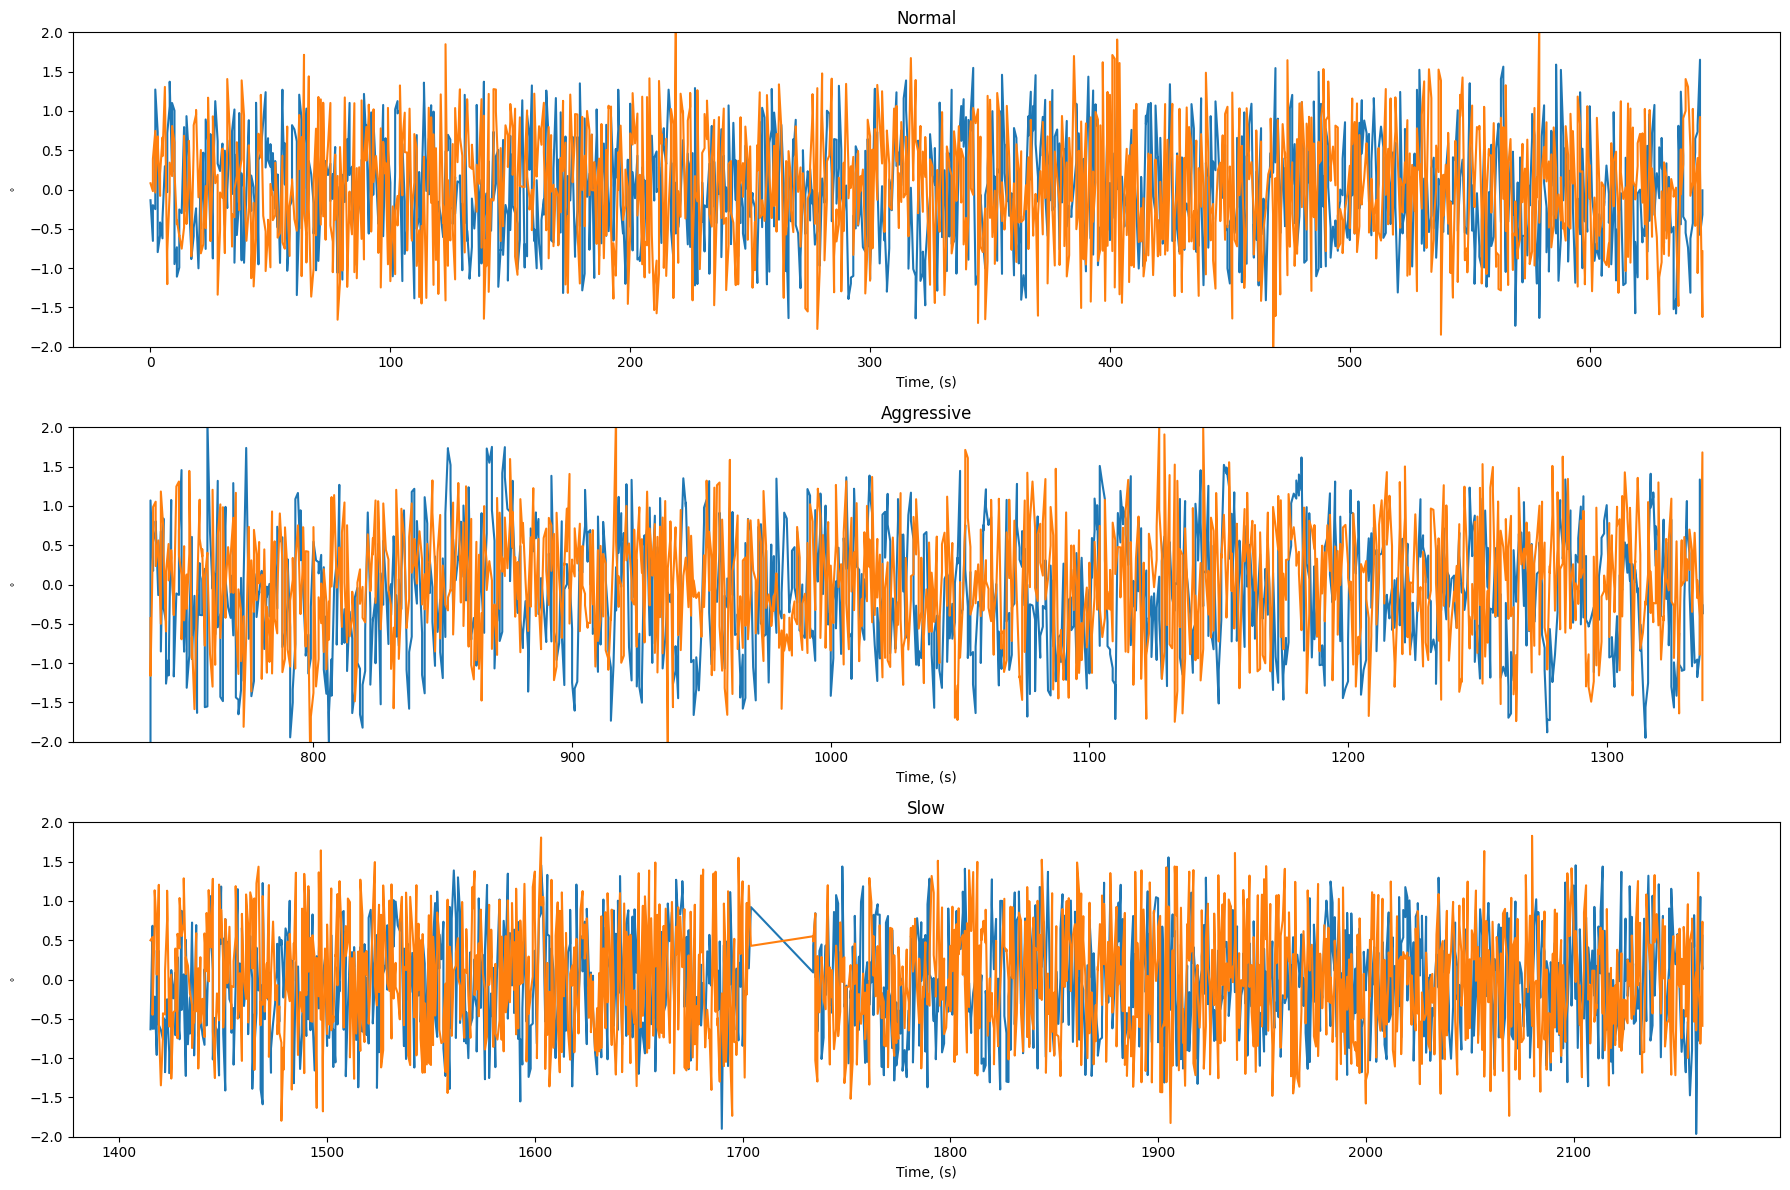

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

classes_train = [train_normal, train_aggressive, train_slow]
classes_names = ['Normal', 'Aggressive', 'Slow']
names = ['Acceleration', 'Gyroscope']

for i in range(len(classes_names)):
    time = classes_train[i]['Timestamp']
    accel_data = np.column_stack((classes_train[i].iloc[:, 1], classes_train[i].iloc[:, 2], classes_train[i].iloc[:, 3]))  # Simulated accelerometer data
    gyro_data = np.column_stack((classes_train[i].iloc[:, 4], classes_train[i].iloc[:, 5], classes_train[i].iloc[:, 6]))  # Simulated gyroscope data

    # Process data using complementary filter
    pitch, roll, yaw = complementary_filter(accel_data, gyro_data, alpha=0.78)

    # axs[i].plot(time, pitch)
    axs[i].plot(time, roll)
    axs[i].plot(time, yaw)
    axs[i].set_ylim([-2, 2])
    axs[i].set_title(classes_names[i])
    axs[i].set_xlabel('Time, (s)')
    axs[i].set_ylabel(r"$^{\circ}$")

plt.tight_layout()
plt.show()